# End-Gauge Measurement
## Example H1 from the GUM and GUM-Supplement 1

The example defines numerous input parameters with different distributions.

Note: GUM H1 uses all normal/standard distributions for GUM calculation. Supplement 1 describes distribution
types for Monte-Carlo. This example retains the distribution information as entered into the `typeb` methods.

In [1]:
import suncal

In [2]:
u = suncal.Model('l = d - l_s*(alpha_s*d_theta + d_alpha*theta) + l_s')

# l_s is given as u=.075 @ k=3
u.var('l_s').measure(50000623.6, description='Length of standard at 20C from certificate', units='nm')
u.var('l_s').typeb(name='u_{ls}', unc=75, k=3, degf=18, description='Uncertainty of the standard')

# Variable d has 3 uncertainties...
u.var('d').measure(215, description='Measured difference between end gauges', units='nm')
# First is T-distribution with k=1 uncertainty of 10...
u.var('d').typeb(name='u_{d1}', dist='t', unc=10, conf=.95, degf=5, description='Random effects of comparator')
# Normal with k=3...
u.var('d').typeb(name='u_{d2}', unc=20, k=3, degf=8, description='Systematic effects of comparator')
# and a standard uncertainty.
u.var('d').typeb(name='u_d', std=5.8, degf=24, description='Repeated obeservations')

# theta has 2 uncertainty components.
# Arcsine distribution specified with half-width parameter a, and standard uncertainty
u.var('theta').measure(-0.1, description='Deviation in temperature of test bed from 20C ambient', units='delta_degC')
u.var('theta').typeb(name='u_Delta', dist='arcsine', a=0.5, description='Cyclic variation of temperature in room')
u.var('theta').typeb(name='u_theta', std=0.2, description='Mean temperature of the bed')

# Uniform distribution specified with half-width parameter a
u.var('alpha_s').measure(1.15E-5, description='Coefficient of thermal expansion', units='1/delta_degC')
u.var('alpha_s').typeb(name='u_{alpha_s}', dist='uniform', a=2E-6, description='Thermal expansion coefficient of standard')

# d_alpha and d_theta have Curvilinear Trapezoid distributions, with half-width a and curvature d
u.var('d_alpha').measure(0, description='Difference in expansion coefficients', units='1/delta_degC')
u.var('d_alpha').typeb(name='u_{da}', dist='curvtrap', a=1E-6, d=0.1E-6, degf=50, description='Difference in expansion coefficients')  # Curvilinear Trapezoid (See GUM-S1)

u.var('d_theta').measure(0, description='Difference in temperatures', units='delta_degC')
u.var('d_theta').typeb(name='u_{dt}', dist='curvtrap', a=.05, d=.025, degf=2, description='Difference in temperatures')

report = u.calculate().units(l='nm').report
report

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$l$   | GUM          | 5.0000839e+07 nm  | 32 nm           | ± 68 nm     | 2.122     | 15.8          |
|$l$   | Monte Carlo  | 5.0000839e+07 nm  | 34 nm           | (5.0000772e+07 nm, 5.0000905e+07 nm) | 1.958     | -             |

In [3]:
report.allinputs()

Variable,Mean,Std. Uncertainty,Deg. Freedom,Description
$\alpha_{s}$,0.0000115 1/Δ°C,1.2e-06 1/Δ°C,inf,Coefficient of thermal expansion
$d$,215.0 nm,9.7 nm,26,Measured difference between end gauges
$d_{\alpha}$,0.0 1/Δ°C,5.8e-07 1/Δ°C,50,Difference in expansion coefficients
$d_{\theta}$,0.0 Δ°C,0.030 Δ°C,2.0,Difference in temperatures
$l_{s}$,5.0000624e+07 nm,25 nm,18,Length of standard at 20C from certificate
$\theta$,-0.10 Δ°C,0.41 Δ°C,inf,Deviation in temperature of test bed from 20C ambient
Variable,Component,Standard Uncertainty,Deg. Freedom,Description
$\alpha_{s}$,-,-,-,Coefficient of thermal expansion
-,u_{alpha_s},1.2e-06 1/Δ°C,inf,Thermal expansion coefficient of standard
$d$,-,-,-,Measured difference between end gauges


In [4]:
report.variables.components()

Variable,Component,Standard Uncertainty,Deg. Freedom,Description
$\alpha_{s}$,-,-,-,Coefficient of thermal expansion
-,u_{alpha_s},1.2e-06 1/Δ°C,inf,Thermal expansion coefficient of standard
$d$,-,-,-,Measured difference between end gauges
-,u_{d1},3.9 nm,5.0,Random effects of comparator
-,u_{d2},6.7 nm,8.0,Systematic effects of comparator
-,u_d,5.8 nm,24,Repeated obeservations
$d_{\alpha}$,-,-,-,Difference in expansion coefficients
-,u_{da},5.8e-07 1/Δ°C,50,Difference in expansion coefficients
$d_{\theta}$,-,-,-,Difference in temperatures
-,u_{dt},0.030 Δ°C,2.0,Difference in temperatures


In [5]:
report.expanded()

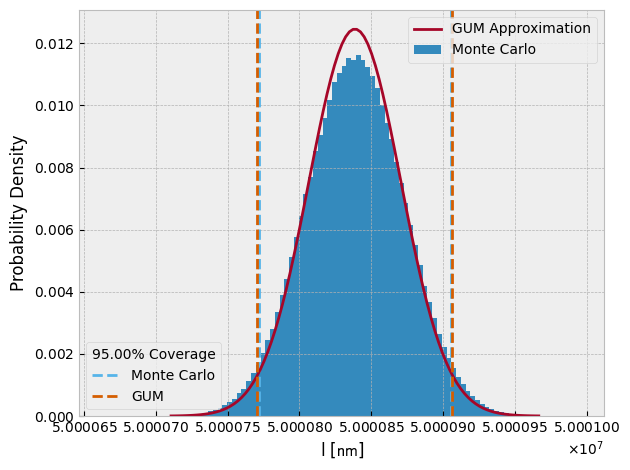

In [6]:
# Compare to GUM-Supplement1 Figure 17
report.plot.pdf(interval=.95);

In [7]:
report.gum.derivation()

Variable,Std. Uncertainty,Deg. Freedom
$\alpha_{s}$,$u_{\alpha s}$,$\nu_{\alpha s}$
$d$,$u_{d}$,$\nu_{d}$
$d_{\alpha}$,$u_{d \alpha}$,$\nu_{d \alpha}$
$d_{\theta}$,$u_{d \theta}$,$\nu_{d \theta}$
$l_{s}$,$u_{l s}$,$\nu_{l s}$
$\theta$,$u_{\theta}$,$\nu_{\theta}$
